# придание цветов объектам

In [76]:
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPooling2D,UpSampling2D,InputLayer
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
# from io import BytesIO
from skimage.color import rgb2lab,lab2rgb
from skimage.io import imsave
from PIL import Image
%matplotlib inline

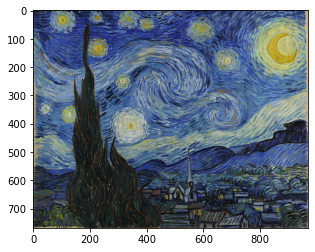

In [79]:
img = Image.open('Van_Gogh.jpg')
plt.imshow(img)

In [83]:
def processed_image(processed_img):
    image = processed_img.resize((256,256),Image.BILINEAR)
    #     image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image = np.array(image,dtype=float)
    size = image.shape
    lab = rgb2lab(1.0/255*image)
    plt.imshow(lab)
    X,Y = lab[:,:,0],lab[:,:,1:]

    Y /= 128 # from -1 to 1 
    X = X.reshape(1,size[0],size[1],1) #light
    Y = Y.reshape(1,size[0],size[1],2) # a,b
    return X,Y,size

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


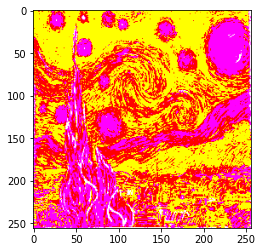

In [84]:
X,Y,size = processed_image(img)

In [85]:
model = Sequential()
model.add(InputLayer(input_shape=(None,None,1)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same',strides=2)) ######
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same',strides=2))#######
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same',strides=2))###### три раза уменьшили
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))###########
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))###########
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(Conv2D(2,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))########### три раза увеличили

In [86]:
model.compile(optimizer='adam',loss='mse')
model.fit(x=X,y=Y,batch_size=1,epochs=50)

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.1080
Epoch 2/50
1/1 [==============================] - 1s 535ms/step - loss: 0.0168
Epoch 3/50
1/1 [==============================] - 0s 489ms/step - loss: 0.0169
Epoch 4/50
1/1 [==============================] - 1s 509ms/step - loss: 0.0167
Epoch 5/50
1/1 [==============================] - 1s 565ms/step - loss: 0.0167
Epoch 6/50
1/1 [==============================] - 1s 556ms/step - loss: 0.0167
Epoch 7/50
1/1 [==============================] - 1s 519ms/step - loss: 0.0167
Epoch 8/50
1/1 [==============================] - 0s 495ms/step - loss: 0.0167
Epoch 9/50
1/1 [==============================] - 0s 499ms/step - loss: 0.0167
Epoch 10/50
1/1 [==============================] - 1s 508ms/step - loss: 0.0167
Epoch 11/50
1/1 [==============================] - 1s 504ms/step - loss: 0.0167
Epoch 12/50
1/1 [==============================] - 1s 501ms/step - loss: 0.0167
Epoch 13/50
1/1 [==============================] - 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


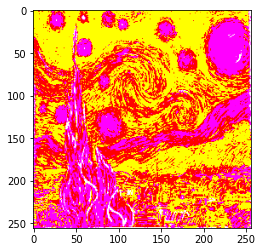

In [89]:
img = Image.open('Van_Gogh.jpg')
X,Y, size = processed_image(img)

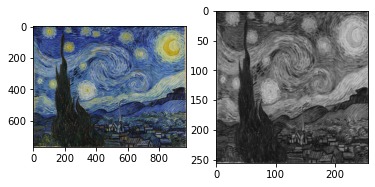

In [90]:
output = model.predict(X)
output *= 128
# Outputs colorization
min_vals,max_vals= -128,127
ab = np.clip(output[0],min_vals,max_vals)

cur = np.zeros((size[0],size[1],3))
cur[:,:,0] = np.clip(X[0][:,:,0],0,100)
cur[:,:,1:] = ab

plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(lab2rgb(cur))
